Goal
=====

In this session we will focus mainly on the KNN algorithm.

Dataset Information
=====================

In this example, we use the iris dataset. We split the data into a train and test dataset.



Load the dataset
======


Load the libraries and data

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Decision boundary
=====
Now, we fit two classifiers with different values of the parameter weights. We plot the decision boundary of each classifier as well as the original dataset to observe the difference.

We observe that the parameter weights has an impact on the decision boundary. When weights="unifom" all nearest neighbors will have the same impact on the decision. Whereas when weights="distance" the weight given to each neighbor is proportional to the inverse of the distance from that neighbor to the query point.

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

#Using a pipline in order to apply different steps: data scaling by mean and std (important for euclidean distance) and kNN
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2))]
)

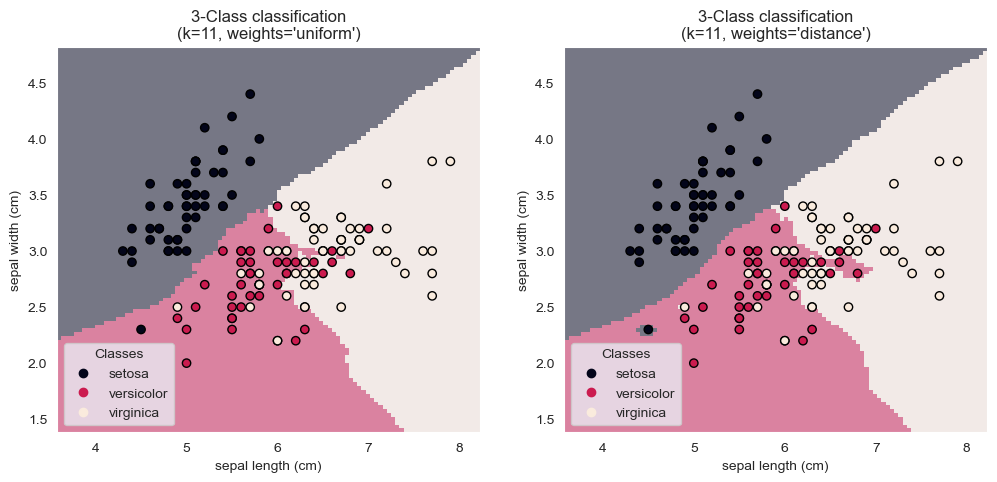

array([0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1,
       2, 0, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2])

In [16]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )
plt.show()

#For predicting new samples
# Predict the outcome for the test set
y_pred = clf.predict(X_test)
y_pred